In [21]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import f1_score

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


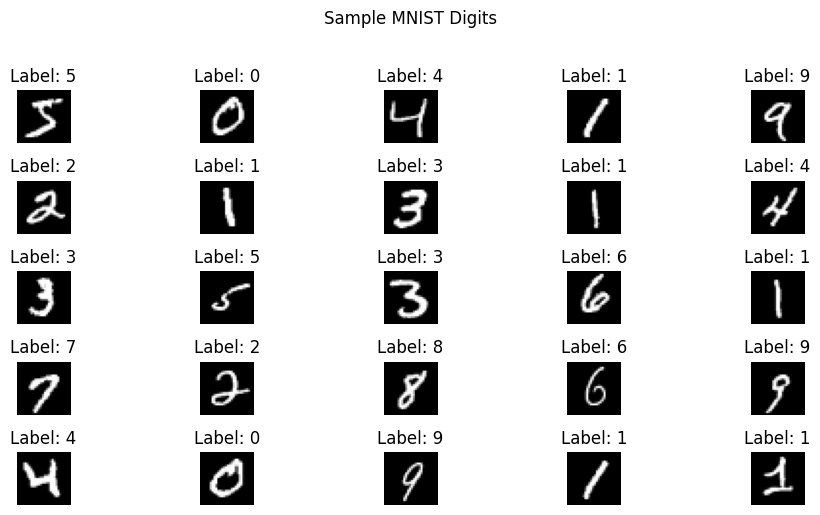

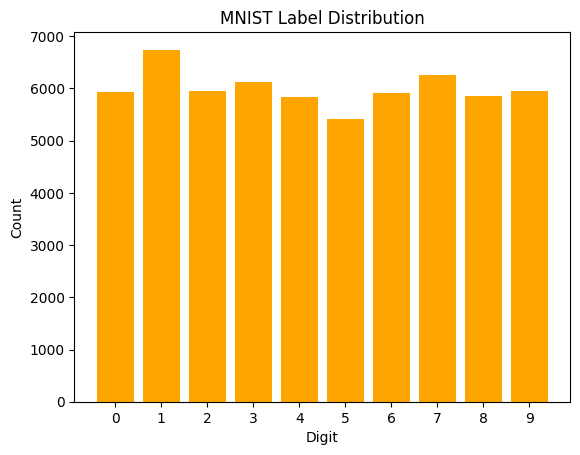

In [2]:
# Step 2: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Show a 5x5 grid of MNIST digit samples
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits", y=1.02)
plt.tight_layout()
plt.show()


# Bar chart showing how many samples per digit
import collections

mnist_counts = collections.Counter(y_train)
plt.bar(mnist_counts.keys(), mnist_counts.values(), color="orange")
plt.title("MNIST Label Distribution")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.xticks(range(10))
plt.show()


In [3]:
# Step 3: Logistic Regression Baseline (Flattened input)
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_flat, y_train)
y_pred_log = logreg.predict(x_test_flat)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9264


In [4]:
from sklearn.metrics import classification_report

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log, digits=4))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0     0.9532    0.9765    0.9647       980
           1     0.9619    0.9797    0.9708      1135
           2     0.9281    0.9012    0.9145      1032
           3     0.9040    0.9139    0.9089      1010
           4     0.9362    0.9409    0.9385       982
           5     0.8941    0.8711    0.8825       892
           6     0.9441    0.9520    0.9480       958
           7     0.9322    0.9232    0.9277      1028
           8     0.8859    0.8768    0.8813       974
           9     0.9141    0.9177    0.9159      1009

    accuracy                         0.9264     10000
   macro avg     0.9254    0.9253    0.9253     10000
weighted avg     0.9262    0.9264    0.9262     10000



In [5]:
# Step 4: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [8]:
# Step 5: Build CNN Model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [9]:
# Step 6: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
early_stop = EarlyStopping(patience=3, restore_best_weights=True)
model_ckpt = ModelCheckpoint('best_emnist_model.keras', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
callbacks = [early_stop, reduce_lr, model_ckpt]

In [14]:
# Step 7: Train the Model with Augmentation
history = model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                    validation_data=(x_test, y_test_cat),
                    epochs=25,
                    callbacks=callbacks)

Epoch 1/25


c:\Machine Learning\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.7404 - loss: 0.7830 - val_accuracy: 0.9848 - val_loss: 0.0477 - learning_rate: 0.0010
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9428 - loss: 0.1903 - val_accuracy: 0.9877 - val_loss: 0.0334 - learning_rate: 0.0010
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9608 - loss: 0.1342 - val_accuracy: 0.9882 - val_loss: 0.0345 - learning_rate: 0.0010
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9657 - loss: 0.1131 - val_accuracy: 0.9919 - val_loss: 0.0243 - learning_rate: 0.0010
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9729 - loss: 0.0920 - val_accuracy: 0.9921 - val_loss: 0.0225 - learning_rate: 0.0010
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9766 - loss: 0.0817 - val_accuracy: 0.9934 - val_loss: 0.0191 - learning_rate: 0.0010
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9784 - loss: 0.0735

In [15]:
# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"CNN Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9947 - loss: 0.0181
CNN Test Accuracy: 0.9954


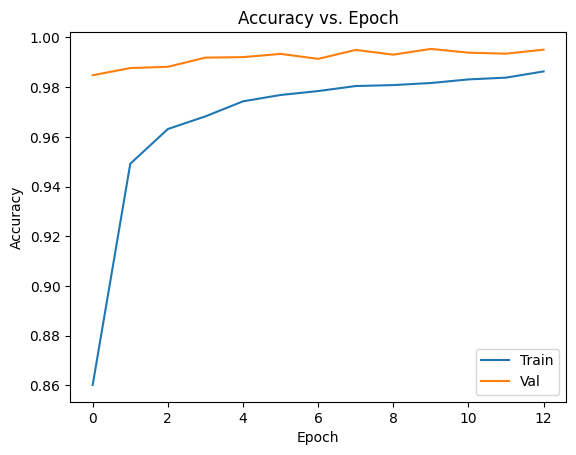

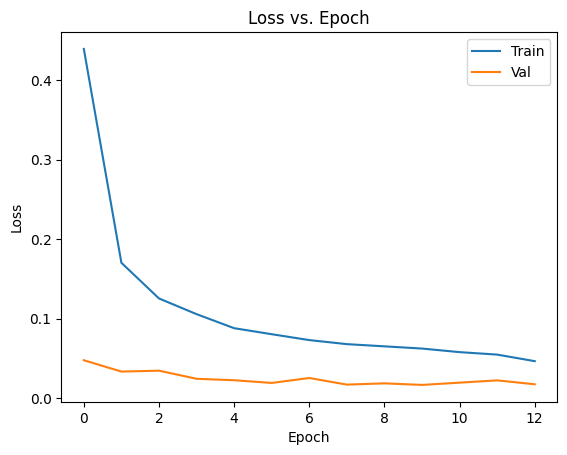

In [16]:
# Step 9: Accuracy/Loss Plots
plt.figure()
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


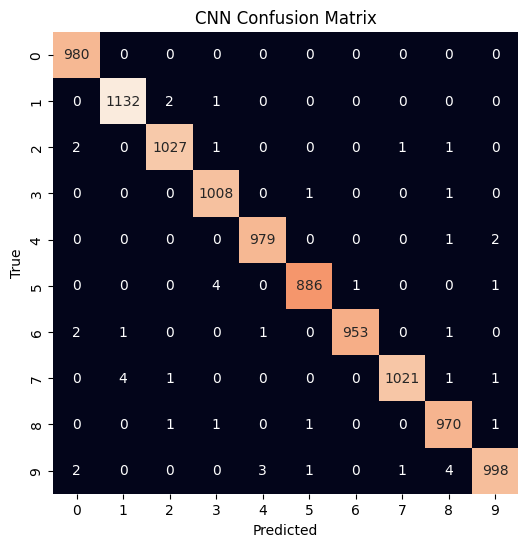

CNN Classification Report:
              precision    recall  f1-score   support

           0     0.9939    1.0000    0.9969       980
           1     0.9956    0.9974    0.9965      1135
           2     0.9961    0.9952    0.9956      1032
           3     0.9931    0.9980    0.9956      1010
           4     0.9959    0.9969    0.9964       982
           5     0.9966    0.9933    0.9949       892
           6     0.9990    0.9948    0.9969       958
           7     0.9980    0.9932    0.9956      1028
           8     0.9908    0.9959    0.9933       974
           9     0.9950    0.9891    0.9920      1009

    accuracy                         0.9954     10000
   macro avg     0.9954    0.9954    0.9954     10000
weighted avg     0.9954    0.9954    0.9954     10000



In [17]:
# Step 10: Confusion Matrix and Classification Report
y_pred_cnn = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn, digits=4))

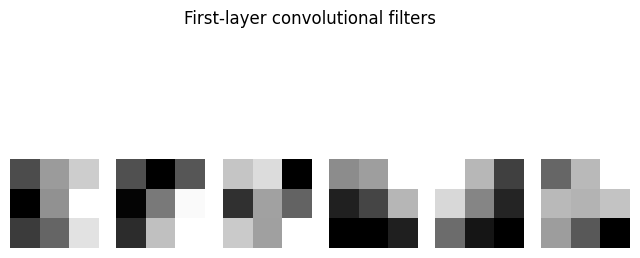

In [18]:
# Step 11: Visualize First Conv2D Filters
filters, _ = model.layers[0].get_weights()
filters = (filters - filters.min()) / (filters.max() - filters.min())
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('First-layer convolutional filters')
plt.show()

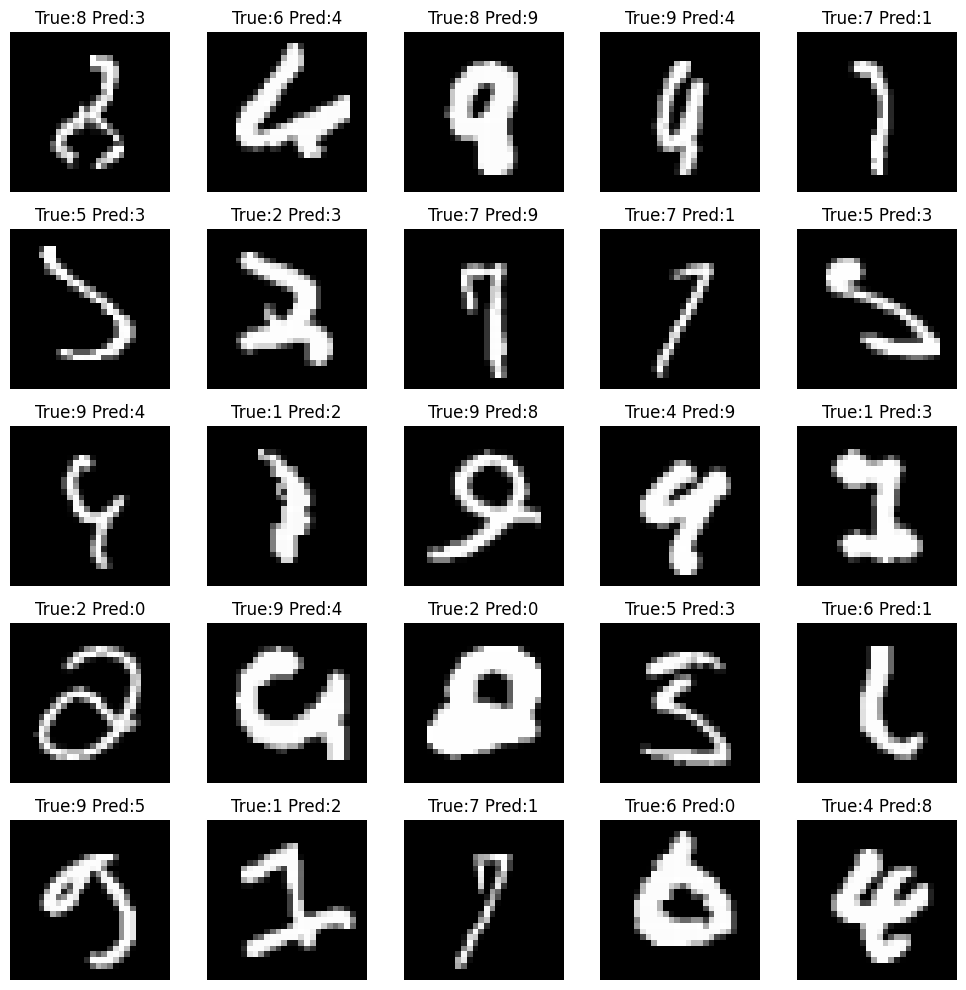

In [19]:


# Step 12: Misclassified Examples
mis = np.where(y_pred_cnn != y_test)[0][:25]
plt.figure(figsize=(10,10))
for idx, wrong in enumerate(mis):
    ax = plt.subplot(5,5,idx+1)
    plt.imshow(x_test[wrong].reshape(28,28), cmap='gray')
    plt.title(f'True:{y_test[wrong]} Pred:{y_pred_cnn[wrong]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [22]:
f1 = f1_score(y_test, y_pred_cnn, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")

Weighted F1 Score: 0.9954
